In [6]:
!pip install sns

  Preparing metadata (setup.py) ... done
  Created wheel for sns: filename=sns-0.1-py3-none-any.whl size=2639 sha256=b4217c089d327c26011729bcb0d8e986a61b7b096715f9f89fbfb5c99383142f
  Stored in directory: /Users/chanukadinuwan/Library/Caches/pip/wheels/7c/e1/f6/7f1e51e342bccba75ac6cfae60918407acaa6999034889d25e
Successfully built sns


In [8]:
import sns

Maha Season                   0
Sown 000 Acres                0
Sown 000 Ha                   0
Harvested 000 Acres           0
Harvested 000 Ha.             0
Average Yield Bushels/Acre    0
Average Yield Kg/Ha           0
Production 000 Bushels        0
Production 000 Mt.            0
dtype: int64
       Sown 000 Acres  Sown 000 Ha  Harvested 000 Acres  Harvested 000 Ha.  \
count       61.000000    61.000000            61.000000          61.000000   
mean      1227.639344   496.918033          1152.819672         466.327869   
std        250.446603   101.354049           251.264834         101.385029   
min        655.000000   265.000000           586.000000         237.000000   
25%       1054.000000   427.000000          1006.000000         407.000000   
50%       1261.000000   510.000000          1183.000000         478.000000   
75%       1417.000000   573.000000          1361.000000         551.000000   
max       1804.000000   731.000000          1692.000000         684.000000 

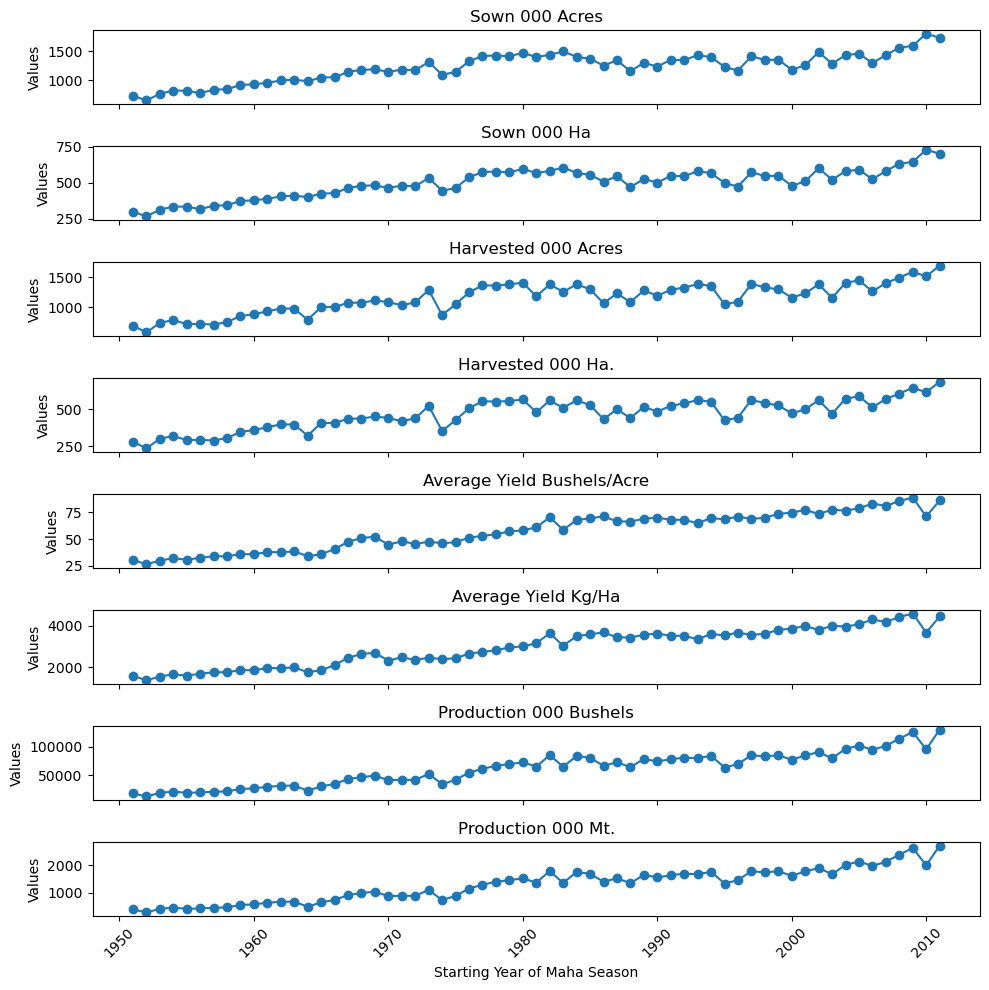

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from a CSV file into a pandas DataFrame
df = pd.read_csv("paddy_production_in_maha_season_1952-2012.csv")

# Convert numeric columns to appropriate data types
numeric_cols = df.columns[1:]  # Exclude the first column (assuming it's the year column)
df[numeric_cols] = df[numeric_cols].astype(float)

# Check for missing values
print(df.isnull().sum())

# Basic descriptive statistics
print(df.describe())

# Extract the starting year from 'Maha Season' and convert it to datetime
df['Starting Year'] = pd.to_datetime(df['Maha Season'].apply(lambda x: x.split('/')[0]), format='%Y')

# Set 'Starting Year' as the index
df.set_index('Starting Year', inplace=True)

# Plot the trends over time for all numeric columns using subplots
fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(10, 10), sharex=True)
for i, col in enumerate(numeric_cols):
    axes[i].plot(df.index, df[col], marker='o', linestyle='-', label=col)
    axes[i].set_title(col)
    axes[i].set_ylabel('Values')

plt.xlabel('Starting Year of Maha Season')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Descriptive Statistics:
       Sown 000 Acres  Sown 000 Ha  Harvested 000 Acres  Harvested 000 Ha.  \
count       61.000000    61.000000            61.000000          61.000000   
mean      1227.639344   496.918033          1152.819672         466.327869   
std        250.446603   101.354049           251.264834         101.385029   
min        655.000000   265.000000           586.000000         237.000000   
25%       1054.000000   427.000000          1006.000000         407.000000   
50%       1261.000000   510.000000          1183.000000         478.000000   
75%       1417.000000   573.000000          1361.000000         551.000000   
max       1804.000000   731.000000          1692.000000         684.000000   

       Average Yield Bushels/Acre  Average Yield Kg/Ha  \
count                   61.000000            61.000000   
mean                    57.454590          2962.147541   
std                     17.501263           902.159536   
min                     26.440000        

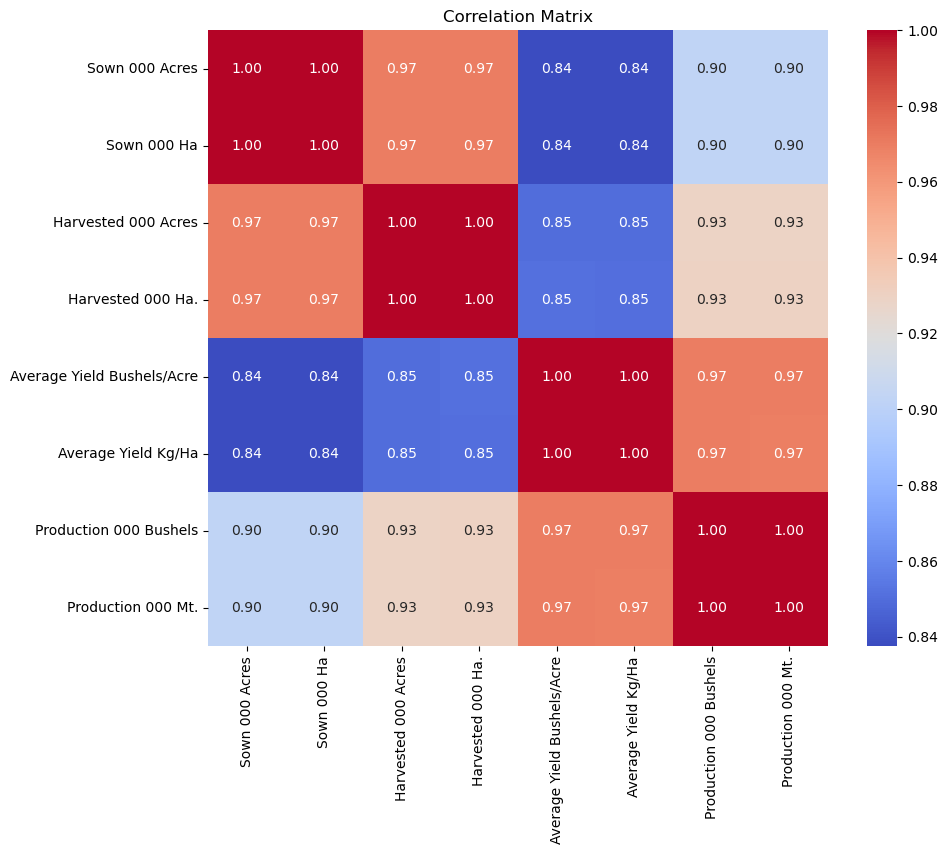

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Descriptive Statistics
print("Descriptive Statistics:")
print(df.describe())

# Diagnostic Analysis
correlation_matrix = df.drop(columns=['Maha Season']).corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Predictive Analysis
# Select features and target variable
X = df[['Sown 000 Acres', 'Harvested 000 Acres', 'Average Yield Bushels/Acre']]
y = df['Production 000 Mt.']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("\nMean Squared Error:", mse)

# Prescriptive Analysis
# Analyze coefficients to understand feature importance
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nFeature Coefficients:")
print(coefficients)


Mean Squared Error: 8031.123534756721

Feature Coefficients:
                      Feature  Coefficient
0              Sown 000 Acres    -0.633257
1         Harvested 000 Acres     1.471768
2  Average Yield Bushels/Acre    23.893835


In [15]:
# Calculate percentage change in production between two consecutive years
df['Production Change'] = df['Production 000 Mt.'].pct_change() * 100


In [16]:
import pandas as pd

# Read the data from a CSV file into a pandas DataFrame
df = pd.read_csv("paddy_production_in_maha_season_1952-2012.csv")

# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Print the percentage of missing values for each column
print("Percentage of missing values for each column:")
print(missing_percentage)

# Calculate the percentage distribution of different categories (e.g., seasons)
season_percentage = (df['Maha Season'].value_counts() / len(df)) * 100

# Print the percentage distribution of different categories
print("\nPercentage distribution of different Maha seasons:")
print(season_percentage)

# Calculate the percentage contribution of each factor to total production
total_production = df['Production 000 Mt.'].sum()
df['Contribution'] = (df['Production 000 Mt.'] / total_production) * 100

# Print the percentage contribution of each factor to total production
print("\nPercentage contribution of each factor to total production:")
print(df[['Maha Season', 'Contribution']])


Percentage of missing values for each column:
Maha Season                   0.0
Sown 000 Acres                0.0
Sown 000 Ha                   0.0
Harvested 000 Acres           0.0
Harvested 000 Ha.             0.0
Average Yield Bushels/Acre    0.0
Average Yield Kg/Ha           0.0
Production 000 Bushels        0.0
Production 000 Mt.            0.0
dtype: float64

Percentage distribution of different Maha seasons:
Maha Season
1951/52    1.639344
1982/83    1.639344
1984/85    1.639344
1985/86    1.639344
1986/87    1.639344
             ...   
1976/77    1.639344
1977/78    1.639344
1978/79    1.639344
1979/80    1.639344
2011/12    1.639344
Name: count, Length: 61, dtype: float64

Percentage contribution of each factor to total production:
   Maha Season  Contribution
0      1951/52      0.491015
1      1952/53      0.352000
2      1953/54      0.513972
3      1954/55      0.579015
4      1955/56      0.516522
..         ...           ...
56     2007/08      2.710148
57     2008/09  

In [17]:
# Convert the 'Maha Season' column to datetime and set it as the index
df['Maha Season'] = pd.to_datetime(df['Maha Season'].str.split('/', expand=True)[0], format='%Y')
df.set_index('Maha Season', inplace=True)

# Calculate percentage change in production between two consecutive years
df['Production Change'] = df['Production 000 Mt.'].pct_change() * 100

# Print the results
print("Percentage Change in Production Between Consecutive Years:")
print(df['Production Change'])

Percentage Change in Production Between Consecutive Years:
Maha Season
1951-01-01          NaN
1952-01-01   -28.311688
1953-01-01    46.014493
1954-01-01    12.655087
1955-01-01   -10.792952
                ...    
2007-01-01     7.704004
2008-01-01    12.188235
2009-01-01    10.318792
2010-01-01   -24.106464
2011-01-01    36.122244
Name: Production Change, Length: 61, dtype: float64


In [20]:
# Calculate total production
total_production = df['Production 000 Mt.'].sum()

# Calculate percentage contribution of each factor to total production
df['Contribution'] = (df['Production 000 Mt.'] / total_production) * 100

# Calculate percentage of each value relative to the total
df['Percentage_of_Total'] = (df['Production 000 Mt.'] / df['Production 000 Mt.'].sum()) * 100

# Calculate percentage distribution of different categories (e.g., seasons)
percentage_distribution = df.index.year.value_counts(normalize=True) * 100

# Calculate year-wise percentage of total production
df['Yearly_Percentage'] = (df['Production 000 Mt.'] / df['Production 000 Mt.'].sum()) * 100

# Print the results
print("Percentage Contribution of Each Factor to Total Production:")
print(df['Contribution'])

print("\nPercentage of Each Value Relative to the Total:")
print(df['Percentage_of_Total'])

print("\nPercentage Distribution of Different Categories (Seasons):")
print(percentage_distribution)

print("\nYear-wise Percentage of Total Production:")
print(df['Yearly_Percentage'])

Percentage Contribution of Each Factor to Total Production:
Maha Season
1951-01-01    0.491015
1952-01-01    0.352000
1953-01-01    0.513972
1954-01-01    0.579015
1955-01-01    0.516522
                ...   
2007-01-01    2.710148
2008-01-01    3.040467
2009-01-01    3.354207
2010-01-01    2.545626
2011-01-01    3.465163
Name: Contribution, Length: 61, dtype: float64

Percentage of Each Value Relative to the Total:
Maha Season
1951-01-01    0.491015
1952-01-01    0.352000
1953-01-01    0.513972
1954-01-01    0.579015
1955-01-01    0.516522
                ...   
2007-01-01    2.710148
2008-01-01    3.040467
2009-01-01    3.354207
2010-01-01    2.545626
2011-01-01    3.465163
Name: Percentage_of_Total, Length: 61, dtype: float64

Percentage Distribution of Different Categories (Seasons):
Maha Season
1951    1.639344
1982    1.639344
1984    1.639344
1985    1.639344
1986    1.639344
          ...   
1976    1.639344
1977    1.639344
1978    1.639344
1979    1.639344
2011    1.639344
N

In [23]:
# Step 2: Calculate the contribution of each factor to the total production
df['Contribution'] = (df.sum(axis=1) / total_production) * 100

# Step 3: Get the overall contribution percentage
overall_contribution_percentage = df['Contribution'].mean()

print("Overall Contribution Percentage:", overall_contribution_percentage)

Overall Contribution Percentage: 88.42107546516112


In [24]:
total_production = df['Production 000 Mt.'].sum()
print(total_production)

78409


In [28]:
# Calculate percentage of each value relative to the total
df['Percentage_of_Total'] = (df['Production 000 Mt.'] / df['Production 000 Mt.'].sum()) * 100

# Calculate percentage distribution of different categories (e.g., seasons)
percentage_distribution = df.index.year.value_counts(normalize=True) * 100

# Calculate year-wise percentage of total production
df['Yearly_Percentage'] = (df['Production 000 Mt.'] / df['Production 000 Mt.'].sum()) * 100

print("\nMax Percentage of Value Relative to the Total:")
print(df['Percentage_of_Total'].max())

print("\nPercentage Distribution of Different Categories (Seasons):")
print(percentage_distribution.mean())

print("\nYear-wise Percentage of Total Production:")
print(df['Yearly_Percentage'].mean())


Max Percentage of Value Relative to the Total:
3.4651634378706526

Percentage Distribution of Different Categories (Seasons):
1.6393442622950825

Year-wise Percentage of Total Production:
1.639344262295082


In [35]:
# Calculate the average yield per acre in bushels
average_yield_per_acre = df['Production 000 Bushels'] / df['Harvested 000 Acres']
print("Average Yield per Acre in Bushels (bu):", average_yield_per_acre.mean())


Average Yield per Acre in Bushels (bu): 50.47822621131487


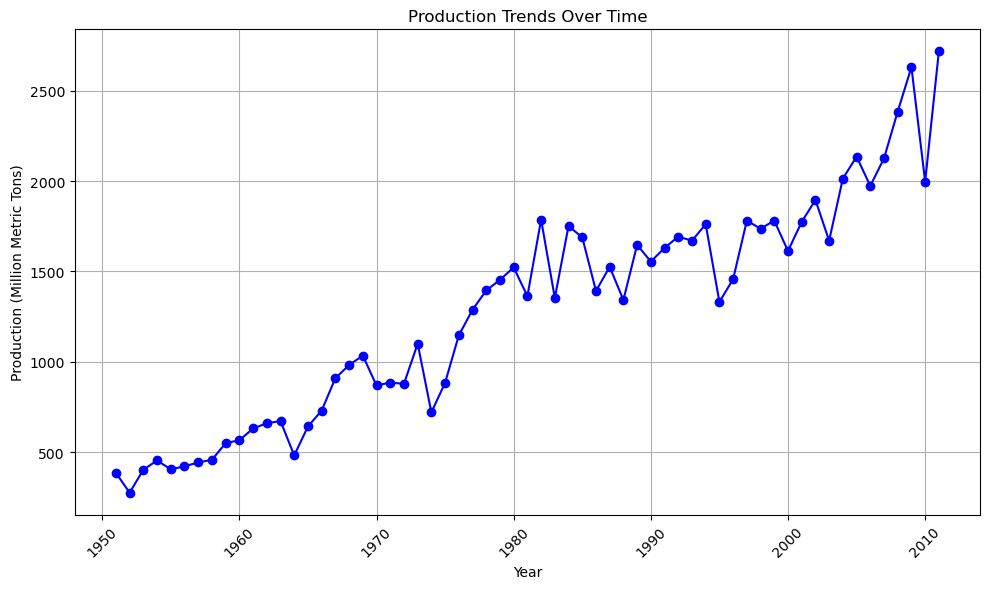

In [38]:
# Read the data from a CSV file into a pandas DataFrame
df = pd.read_csv("paddy_production_in_maha_season_1952-2012.csv")

# Convert 'Maha Season' to datetime and set as index
df['Maha Season'] = pd.to_datetime(df['Maha Season'].str.split('/').str[0], format='%Y')
df.set_index('Maha Season', inplace=True)

# Plot the production trends over time
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Production 000 Mt.'], marker='o', linestyle='-', color='b')
plt.title('Production Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Production (Million Metric Tons)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

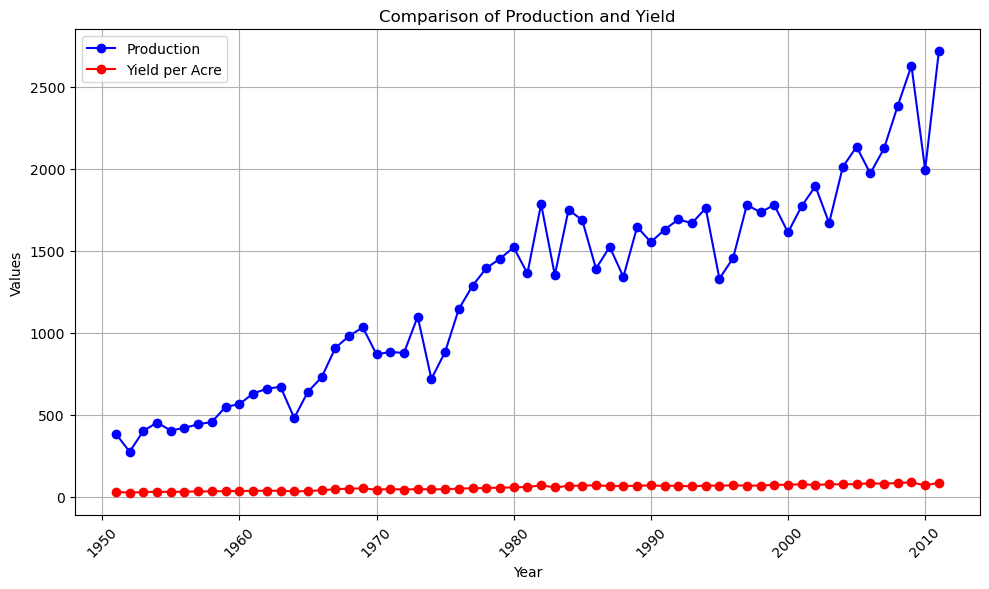

In [39]:
# Comparison of Production and Yield (Line Chart)
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Production 000 Mt.'], marker='o', linestyle='-', color='b', label='Production')
plt.plot(df.index, df['Average Yield Bushels/Acre'], marker='o', linestyle='-', color='r', label='Yield per Acre')
plt.title('Comparison of Production and Yield')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

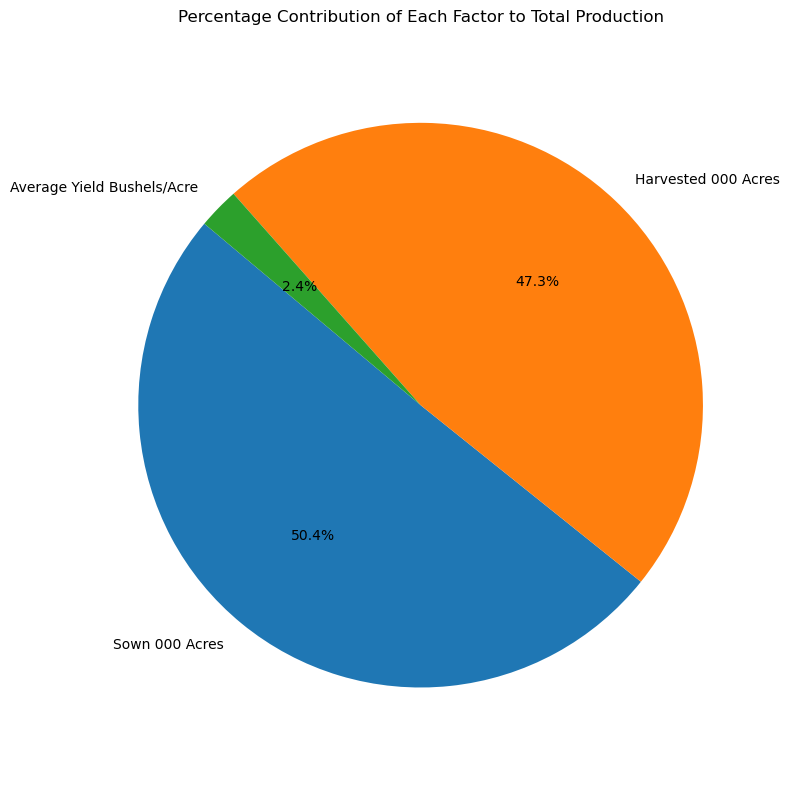

In [40]:
# Percentage Contribution of Each Factor (Pie Chart)
total_production = df['Production 000 Mt.'].sum()
contribution = (df[['Sown 000 Acres', 'Harvested 000 Acres', 'Average Yield Bushels/Acre']].sum() / total_production) * 100

plt.figure(figsize=(8, 8))
plt.pie(contribution, labels=contribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage Contribution of Each Factor to Total Production')
plt.axis('equal')
plt.tight_layout()
plt.show()


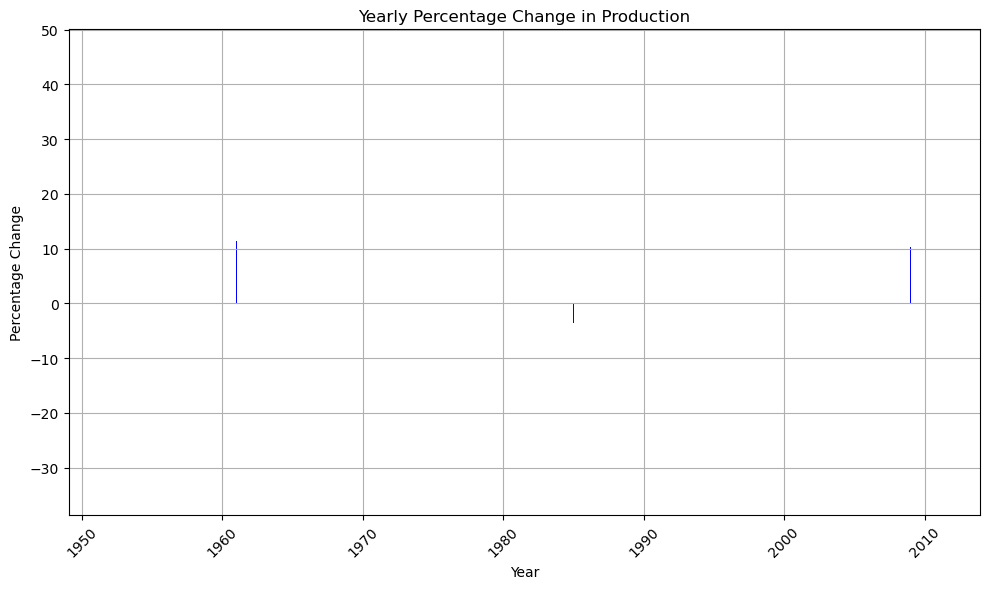

In [41]:
# Yearly Percentage Change in Production (Bar Chart)
yearly_production_change = df['Production 000 Mt.'].pct_change() * 100

plt.figure(figsize=(10, 6))
plt.bar(df.index, yearly_production_change, color='b')
plt.title('Yearly Percentage Change in Production')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

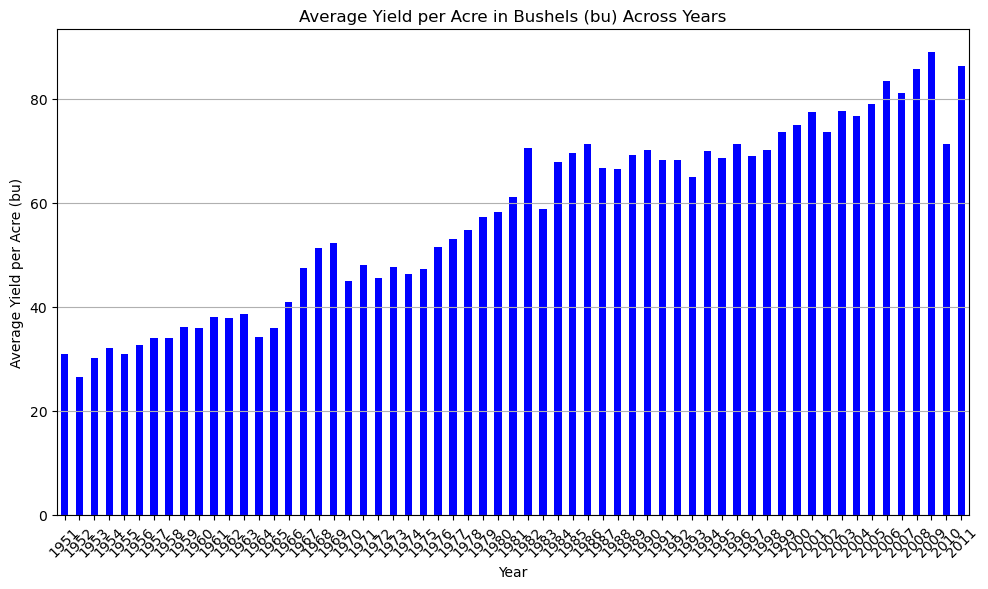

In [45]:


# Aggregate the data to calculate the mean yield per acre for each year
mean_yield_per_year = df.groupby(df.index.year)['Average Yield Bushels/Acre'].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
mean_yield_per_year.plot(kind='bar', color='b')
plt.title('Average Yield per Acre in Bushels (bu) Across Years')
plt.xlabel('Year')
plt.ylabel('Average Yield per Acre (bu)')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [46]:
# Group the production data by season
seasonal_production = df.groupby('Maha Season')['Production 000 Mt.'].sum()

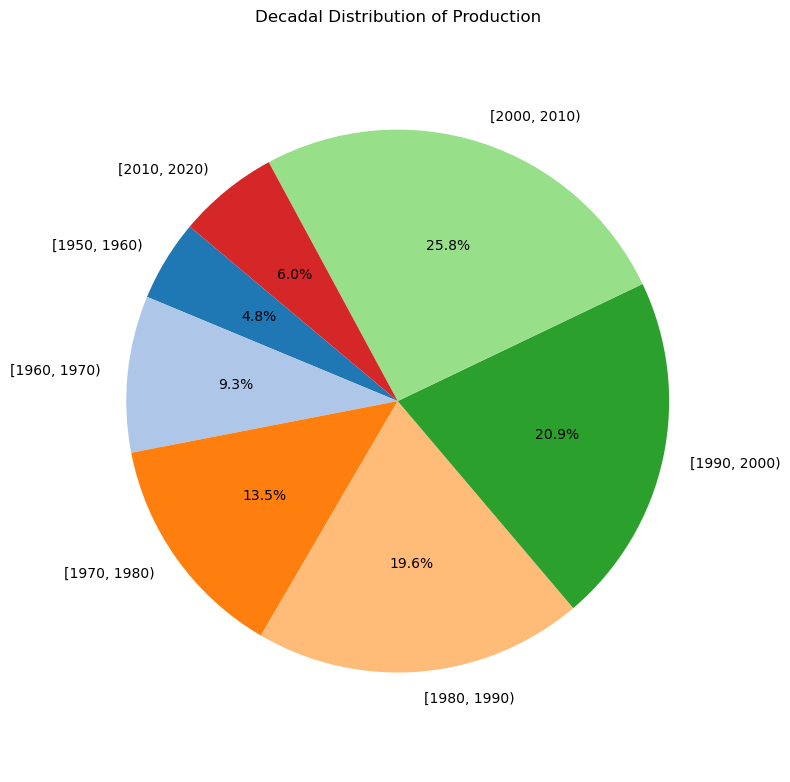

In [49]:
# Read the data from the CSV file
df = pd.read_csv("paddy_production_in_maha_season_1952-2012.csv")

# Convert 'Maha Season' column to datetime
df['Maha Season'] = pd.to_datetime(df['Maha Season'].str.split('/').str[0], format='%Y')

# Group years into 10-year intervals
df['Year Group'] = pd.cut(df['Maha Season'].dt.year, bins=range(1950, 2021, 10), right=False)

# Group the production data by year group and calculate total production
grouped_production = df.groupby('Year Group')['Production 000 Mt.'].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(grouped_production, labels=grouped_production.index.astype(str), autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Decadal Distribution of Production')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

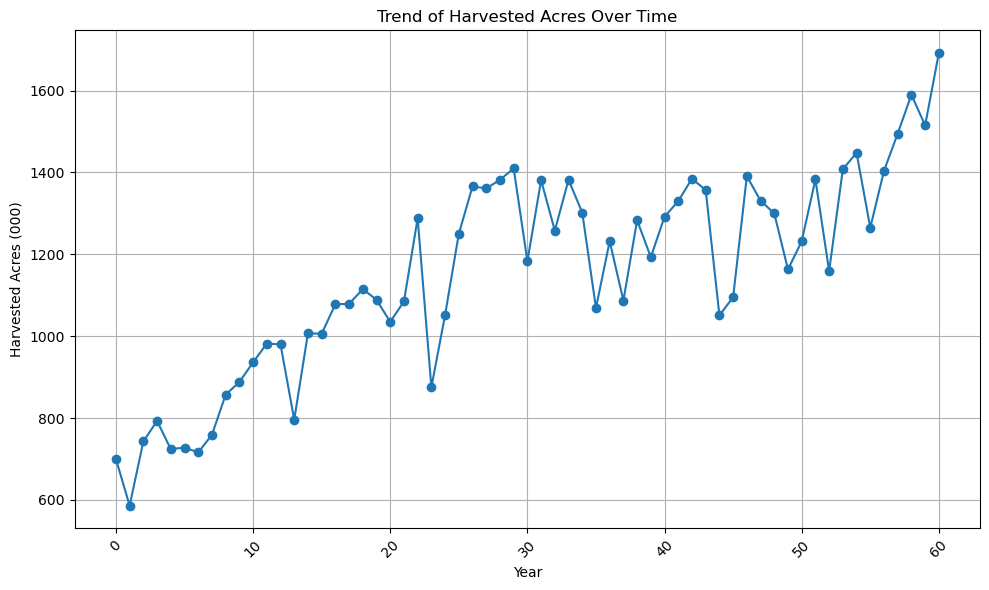

In [50]:

# Assuming 'df' contains your dataset with 'Starting Year' as the index and 'Harvested 000 Acres' as a column

# Plotting the trend of harvested acres over time
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Harvested 000 Acres'], marker='o', linestyle='-')
plt.title('Trend of Harvested Acres Over Time')
plt.xlabel('Year')
plt.ylabel('Harvested Acres (000)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


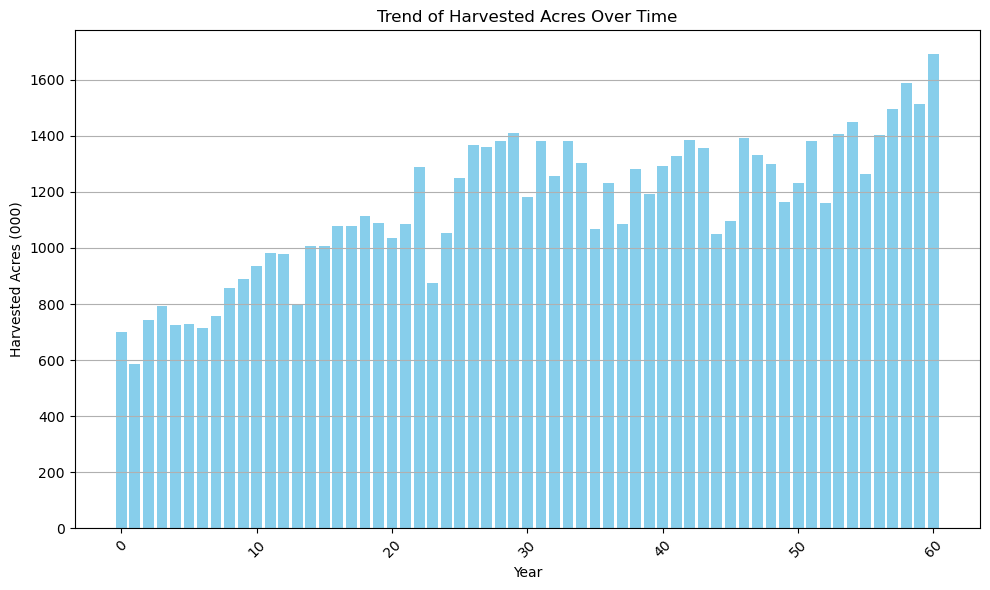

In [51]:


# Assuming 'df' contains your dataset with 'Starting Year' as the index and 'Harvested 000 Acres' as a column

# Plotting the trend of harvested acres over time
plt.figure(figsize=(10, 6))
plt.bar(df.index, df['Harvested 000 Acres'], color='skyblue')
plt.title('Trend of Harvested Acres Over Time')
plt.xlabel('Year')
plt.ylabel('Harvested Acres (000)')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


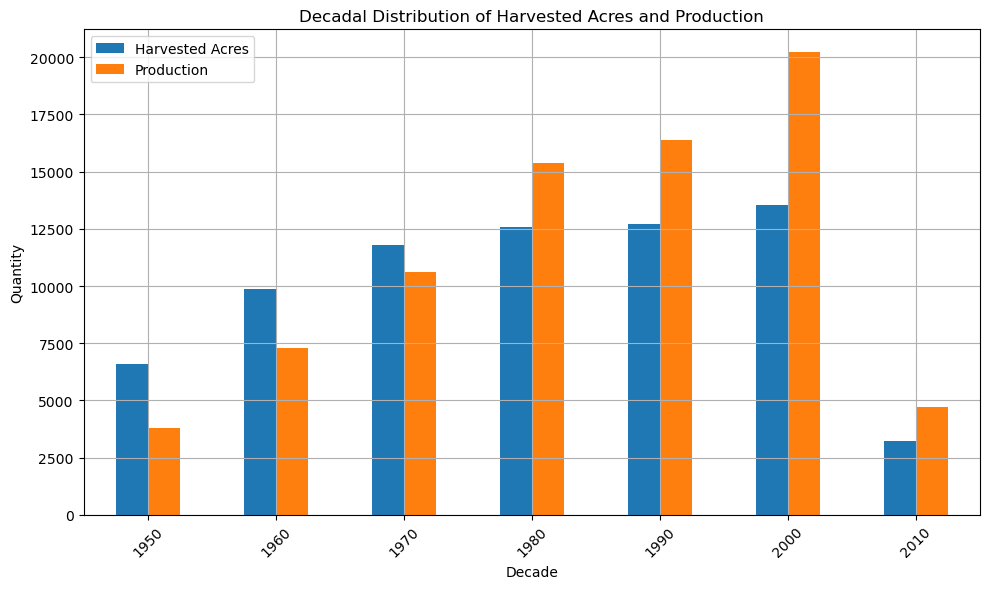

In [52]:


# Read the data from a CSV file into a pandas DataFrame
df = pd.read_csv("paddy_production_in_maha_season_1952-2012.csv")

# Convert the 'Maha Season' column to datetime and set it as the index
df['Maha Season'] = pd.to_datetime(df['Maha Season'].str.split('/', expand=True)[0], format='%Y')
df.set_index('Maha Season', inplace=True)

# Create a new column to represent the decade for each year
df['Decade'] = (df.index.year // 10) * 10

# Aggregate the harvested acres and production data for each decade
decade_data = df.groupby('Decade').sum()

# Plot the aggregated data on a bar chart
decade_data[['Harvested 000 Acres', 'Production 000 Mt.']].plot(kind='bar', figsize=(10, 6))
plt.title('Decadal Distribution of Harvested Acres and Production')
plt.xlabel('Decade')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.legend(['Harvested Acres', 'Production'])
plt.grid(True)
plt.tight_layout()
plt.show()
